In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import r2_score
import missingno as msno
from tqdm import tqdm_notebook

## Load Dateset

In [3]:
df=pd.read_csv('delivery.txt')
df['DELIVERY_DATE']=pd.to_datetime(df['DELIVERY_DATE'])
df=df.set_index('DELIVERY_DATE')

## Missing Value

'/usr/local/share/datasets/matrix_sorted.png'

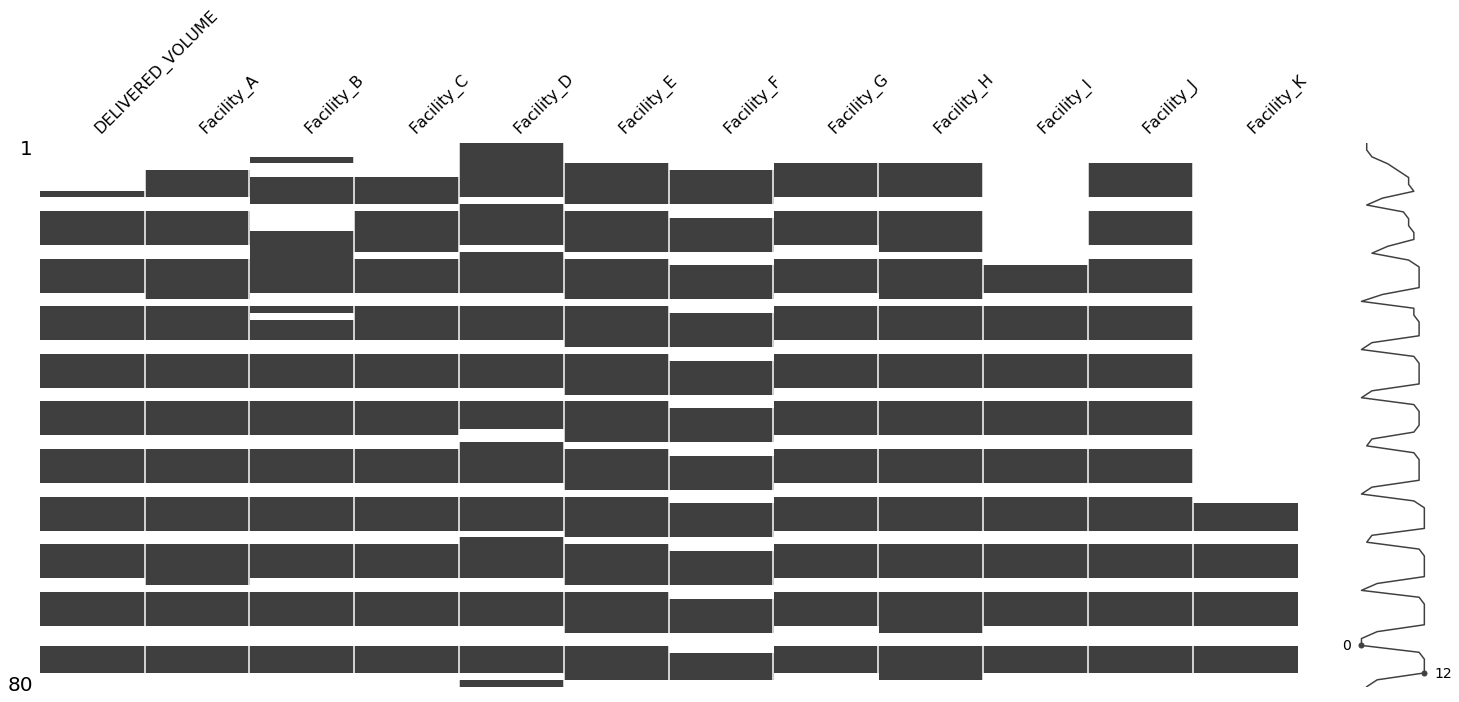

In [4]:
import missingno as msno

# Sort diabetes dataframe on 'Serum_Insulin'
sorted_values = df

# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_sorted.png")

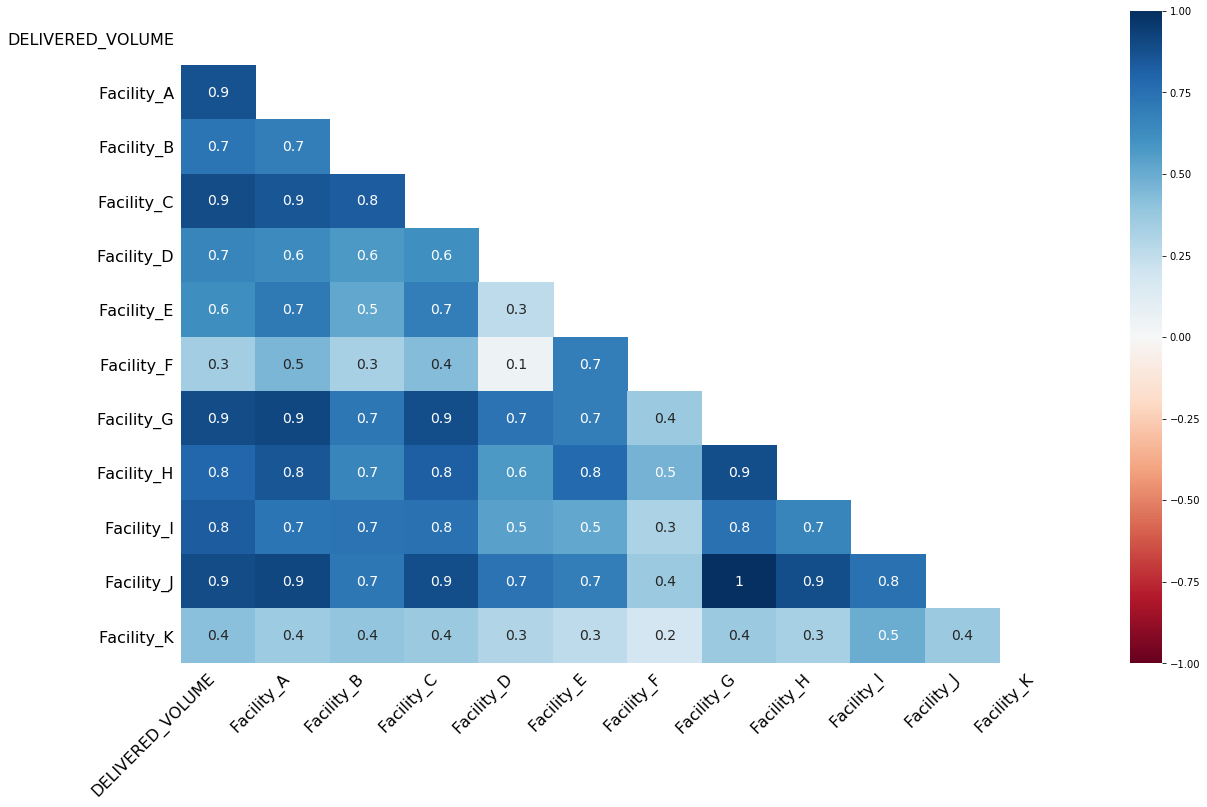

In [5]:
msno.heatmap(df)

# Show plot
plt.show()

## Forward Filling

In [87]:
df_fwd=df.fillna(method='ffill', inplace=True)

# df_ff=df_ff.set_index('DELIVERY_DATE')
# fig, ax = plt.subplots(figsize=(14,5))
# df_ff['DELIVERED_VOLUME'].plot()

## Median

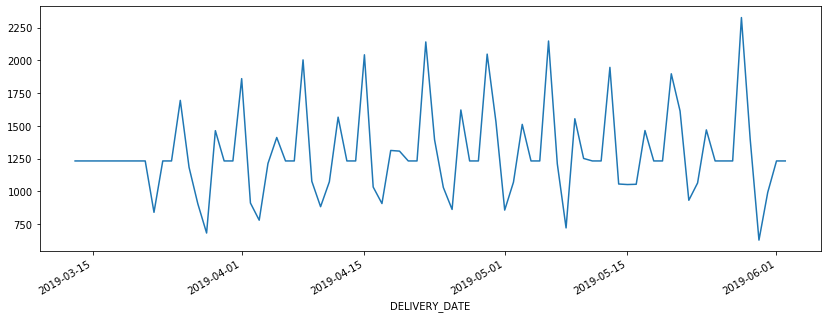

In [6]:
df_med=df.fillna(df.median())
fig, ax = plt.subplots(figsize=(14,5))
df_med['DELIVERED_VOLUME'].plot()

## Mean

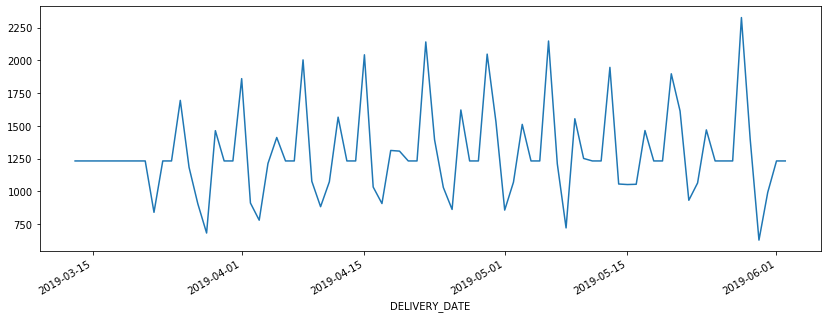

In [272]:
df_mean=df.fillna(df.mean())
fig, ax = plt.subplots(figsize=(14,5))
df_mean['DELIVERED_VOLUME'].plot()

## Mode

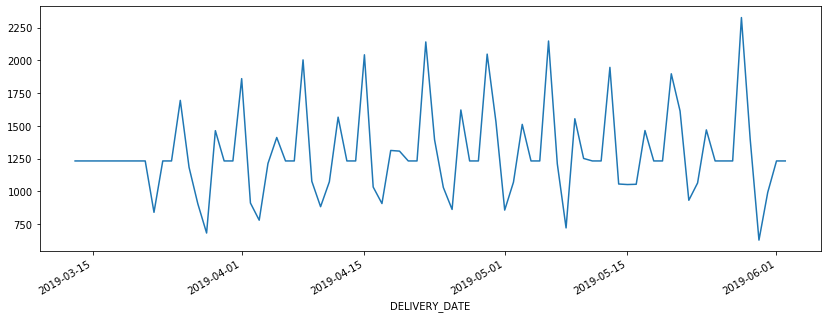

In [271]:
df_mode=df.fillna(df.mode())
fig, ax = plt.subplots(figsize=(14,5))
df_mode['DELIVERED_VOLUME'].plot()

## There Is Seaonality, But No Trend
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
<br/>Level: The average value in the series.
<br/>Trend: The increasing or decreasing value in the series.
<br/>Seasonality: The repeating short-term cycle in the series.
<br/>Noise: The random variation in the series.

In [134]:
# df=df_med.reset_index()
# df['weekend']=np.where(df['DELIVERY_DATE'].dt.weekday<5,0,1)
# df['day_of_week']=df['DELIVERY_DATE'].dt.weekday
# df['day_of_month']=df['DELIVERY_DATE'].dt.day
# df['day_of_year']=(df['DELIVERY_DATE']-datetime.datetime.strptime('01/01/2019',"%d/%m/%Y")).astype('timedelta64[D]')

In [7]:
df.columns

Index(['DELIVERED_VOLUME', 'Facility_A', 'Facility_B', 'Facility_C',
       'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G', 'Facility_H',
       'Facility_I', 'Facility_J', 'Facility_K'],
      dtype='object')

In [8]:
df=df_med

## Check Stationarity
Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.
<br/>Definition of stationarity:
<br/>-constant mean
<br/>-constant variance
<br/>-an autocovariance that does not depend on time.

## Constant Mean?

Text(0.5, 1.0, 'Mean')

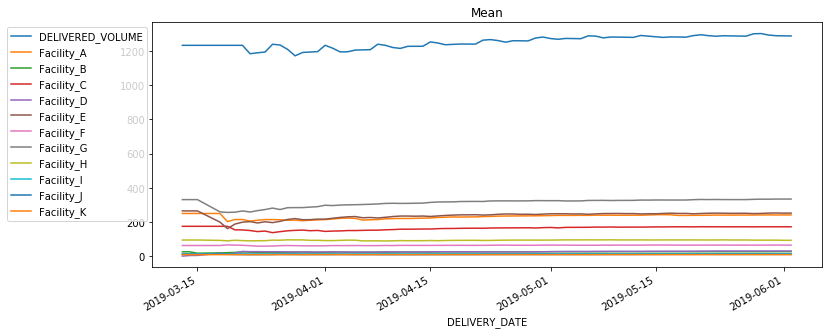

In [233]:
# df=df.set_index('DELIVERY_DATE')
df2=df.expanding().mean()

df2.plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)
plt.title('Mean')

## Constant Variance?

Text(0.5, 1.0, 'Variance')

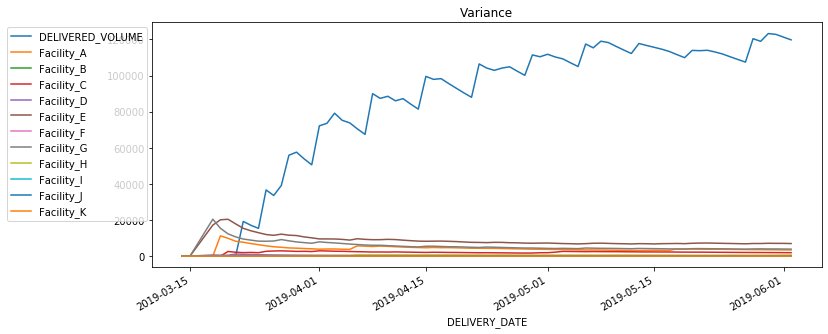

In [175]:
df2=df.expanding().var()

df2.plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)
plt.title('Variance')

## Dickey-Fuller Test For Stationary
Non-Stationary: H,J,day_of_month,day_of_year

In [239]:
from statsmodels.tsa.stattools import adfuller

def df_test(data):

    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


for colname in df.columns:
    print(colname)
    data=df[colname].values
    df_test(data)

DELIVERED_VOLUME
ADF Statistic: -1.689629
p-value: 0.436464
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
Facility_A
ADF Statistic: -5.405031
p-value: 0.000003
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587
Facility_B
ADF Statistic: -6.525157
p-value: 0.000000
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587
Facility_C
ADF Statistic: -10.975119
p-value: 0.000000
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587
Facility_D
ADF Statistic: -5.562093
p-value: 0.000002
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587
Facility_E
ADF Statistic: -4.726672
p-value: 0.000075
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589
Facility_F
ADF Statistic: -3.174826
p-value: 0.021489
Critical Values:
	1%: -3.523
	5%: -2.902
	10%: -2.588
Facility_G
ADF Statistic: -3.844900
p-value: 0.002480
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589
Facility_H
ADF Statistic: -1.416861
p-value: 0.574166
Critical Values:
	1%: -3.523
	5%: -2.902
	10%: -2.588
Facility_I
ADF Statis

## Making The Data Set Stationary

-Transformation
-Exponantial Smoothing


## Constant Mean?

In [238]:
df['DELIVERED_VOLUME_t']=df['DELIVERED_VOLUME'].expanding().mean()

In [240]:
df_test(df['Facility_J'].expanding().mean())

ADF Statistic: -0.843781
p-value: 0.805922
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589


In [236]:
df.columns

Index(['DELIVERED_VOLUME', 'Facility_A', 'Facility_B', 'Facility_C',
       'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G', 'Facility_H',
       'Facility_I', 'Facility_J', 'Facility_K', 'DELIVERED_VOLUME_t'],
      dtype='object')

## Understanding Time Series

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
<br/>d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
<br/>q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

In [9]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['DELIVERED_VOLUME'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1363.0523918685935
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1110.1920629471992
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1041.7490923869668
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:826.4094575958023
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1056.0147563480537
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1008.8304449060505
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:854.8605681122036
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:825.9328742627399
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1276.2793107278796
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1061.3265629449422
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1027.2557126010065
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:814.7303421246382
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1055.9083942987668
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:996.6742433766341
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:855.6252630630579
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:813.849050556839
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1191.559498600457
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1013.3707015866038
A

### ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:799.143502598055 is the best
simple exponential smoothing with growth
https://people.duke.edu/~rnau/411arim.htm

In [11]:
mod = sm.tsa.statespace.SARIMAX(df['DELIVERED_VOLUME'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0001     61.802     -0.016      0.987    -122.130     120.130
ar.S.L12      -0.3178      0.162     -1.966      0.049      -0.635      -0.001
ma.S.L12      -1.0009     61.785     -0.016      0.987    -122.097     120.096
sigma2       1.26e+05      0.000   3.68e+08      0.000    1.26e+05    1.26e+05


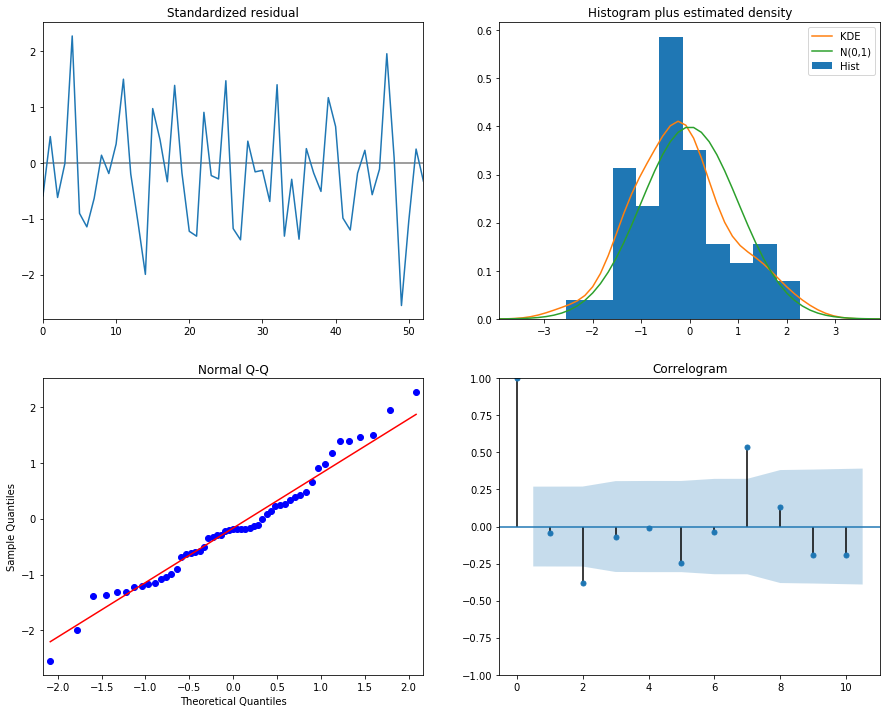

In [12]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-15'), dynamic=False)
pred_ci = pred.conf_int()

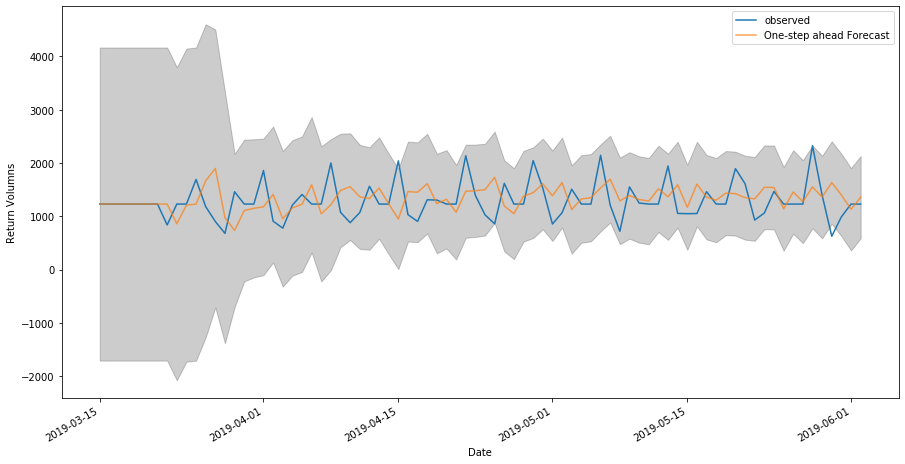

In [14]:
ax = df['DELIVERED_VOLUME']['2019-3-15':].plot(label='observed',figsize=(15, 8))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Return Volumns')
plt.legend()

plt.show()

## Base Line Model Prediction

In [15]:
results.forecast(5)

80    1324.786455
81    1496.006286
82    1455.380892
83    1385.871029
84    1361.447606
dtype: float64

## Model 2: Multivariate Time Series + Supervised Model
1.Use VAR to forecast the number of returns in each facility in the next 5 days
<br/>2.Train supervised model with # of returns,date time features

## Vector Autoregressions(VAR)
https://towardsdatascience.com/multivariate-time-series-forecasting-653372b3db36

In [16]:
from statsmodels.tsa.api import VAR

In [18]:
train=df.iloc[:,1:]
train

,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K
DELIVERY_DATE,,,,,,,,,,,
2019-03-13,250.0,26.0,175.0,1.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5
2019-03-14,250.0,26.0,175.0,8.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5
2019-03-15,250.0,1.0,175.0,6.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5
2019-03-18,250.0,26.0,175.0,55.0,3.0,63.0,45.0,86.0,14.0,16.0,9.5
2019-03-19,13.0,26.0,175.0,3.0,9.0,80.0,243.0,80.0,14.0,6.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-29,284.0,36.0,206.0,46.0,328.0,79.0,414.0,69.0,14.0,10.0,8.0
2019-05-30,264.0,21.0,179.0,9.0,382.0,71.0,311.0,104.0,9.0,12.0,8.0
2019-05-31,208.0,52.0,163.0,48.0,312.0,79.0,401.0,109.0,8.0,8.0,10.0


In [19]:
model=VAR(train)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=5)
print(pred)

[[243.45470298  26.21406341 168.67395314  29.73531738 248.42112177
   67.34753199 341.89782711  96.91571747  14.4953176   11.54826468
    9.42745496]
 [246.29044234  27.66662896 175.60277958  31.92544085 257.13986676
   65.49929809 332.98526615  92.75250197  14.64859315  11.36783298
    9.63598892]
 [241.42926901  27.19962156 172.25539876  31.00956213 252.6929878
   65.59421924 335.6470492   93.90506247  14.5779615   11.45256572
    9.49957129]
 [241.92462625  27.22919054 172.77746059  31.31324384 253.02842113
   65.25264453 333.94266089  93.24523264  14.5547087   11.37450639
    9.55406449]
 [241.11995027  27.09299886 172.23183064  31.22741936 251.92267649
   65.27870697 334.17665001  93.28935612  14.56463351  11.37727506
    9.53322124]]


## Appending Facility Prediction To DF

In [20]:
df2=df.reset_index()

In [249]:
# df2=df.reset_index().drop(['DELIVERED_VOLUME','DELIVERY_DATE'],axis=1)

In [21]:
drange=pd.date_range(start='2019-06-03',end='2019-06-07')

for i in range(5):
    zipp=dict(zip(['Facility_A', 'Facility_B', 'Facility_C',
       'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G', 'Facility_H',
       'Facility_I', 'Facility_J', 'Facility_K'],pred[i]))
    zipp['DELIVERY_DATE']=drange[i]
    
    df2=df2.append(zipp,ignore_index=True)
    
    
# df2['weekend']=np.where(df2['DELIVERY_DATE'].dt.weekday<5,0,1)
# df2['day_of_week']=df2['DELIVERY_DATE'].dt.weekday
# df2['day_of_month']=df2['DELIVERY_DATE'].dt.day
# df2['day_of_year']=(df2['DELIVERY_DATE']-datetime.datetime.strptime('01/01/2019',"%d/%m/%Y")).astype('timedelta64[D]')

In [23]:
df2.tail()

,DELIVERY_DATE,DELIVERED_VOLUME,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K,weekend,day_of_week,day_of_month,day_of_year
80,2019-06-03,NaN,243.454703,26.214063,168.673953,29.735317,248.421122,67.347532,341.897827,96.915717,14.495318,11.548265,9.427455,0,0,3,153.0
81,2019-06-04,NaN,246.290442,27.666629,175.602780,31.925441,257.139867,65.499298,332.985266,92.752502,14.648593,11.367833,9.635989,0,1,4,154.0
82,2019-06-05,NaN,241.429269,27.199622,172.255399,31.009562,252.692988,65.594219,335.647049,93.905062,14.577962,11.452566,9.499571,0,2,5,155.0
83,2019-06-06,NaN,241.924626,27.229191,172.777461,31.313244,253.028421,65.252645,333.942661,93.245233,14.554709,11.374506,9.554064,0,3,6,156.0
84,2019-06-07,NaN,241.119950,27.092999,172.231831,31.227419,251.922676,65.278707,334.176650,93.289356,14.564634,11.377275,9.533221,0,4,7,157.0


In [25]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [26]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

reg = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [254]:
df2.columns

Index(['DELIVERY_DATE', 'DELIVERED_VOLUME', 'Facility_A', 'Facility_B',
       'Facility_C', 'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G',
       'Facility_H', 'Facility_I', 'Facility_J', 'Facility_K',
       'DELIVERED_VOLUME_t', 'weekend', 'day_of_week', 'day_of_month',
       'day_of_year'],
      dtype='object')

In [27]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df['DELIVERY_DATE']
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
 

    
    X = df[['Facility_A',
       'Facility_B', 'Facility_C', 'Facility_D', 'Facility_E', 'Facility_F',
       'Facility_G', 'Facility_H', 'Facility_I', 'Facility_J', 'Facility_K','hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekend']]
    if label:
        y = df[label]
        return X, y
    return X

In [28]:
split_date = '2019-05-15'
df_train =df2.loc[df2['DELIVERY_DATE'] <= split_date].copy()
df_test = df2.loc[df2['DELIVERY_DATE']> split_date].copy()

X_train, y_train = create_features(df_train, label='DELIVERED_VOLUME')
X_test, y_test = create_features(df_test, label='DELIVERED_VOLUME')

In [29]:
X_test=X_test.fillna(X_test.mean())
y_test=y_test.fillna(y_train.mean())

## XG Boost

In [30]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[21:27:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

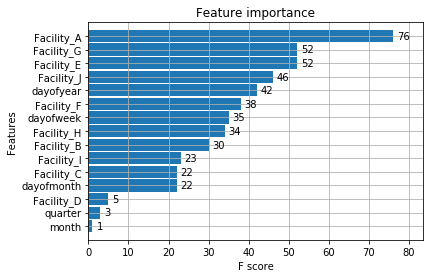

In [31]:
_ = plot_importance(reg, height=0.9)

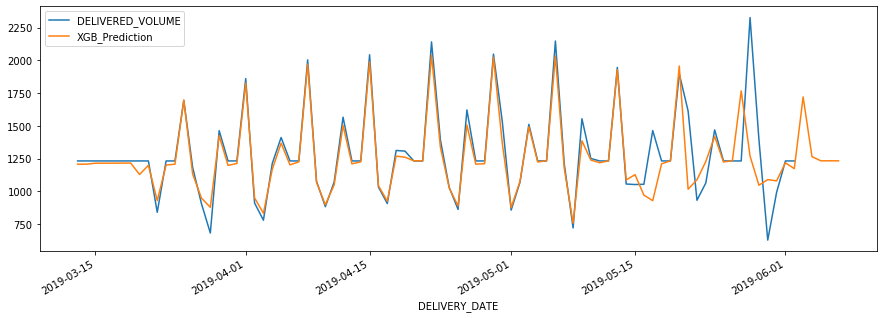

In [32]:
df_train['XGB_Prediction'] = reg.predict(X_train)
df_test['XGB_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)
df_all=df_all.set_index('DELIVERY_DATE')
_ = df_all[['DELIVERED_VOLUME','XGB_Prediction']].plot(figsize=(15, 5))

## Prediction

In [33]:
reg.predict(X_test[-4:])

array([1264.5641, 1233.0381, 1233.0381, 1233.0381], dtype=float32)

## Random Forest

In [35]:
from sklearn.ensemble.forest import RandomForestRegressor
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
rgr=RF_Model.fit(X_train, y_train)

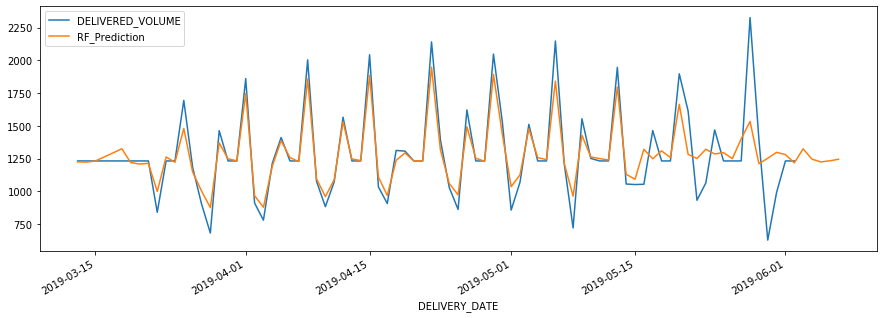

In [36]:
rgr.predict(X_test)
df_train['RF_Prediction'] = rgr.predict(X_train)
df_test['RF_Prediction'] = rgr.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)
df_all=df_all.set_index('DELIVERY_DATE')
_ = df_all[['DELIVERED_VOLUME','RF_Prediction']].plot(figsize=(15, 5))

## Prediction

In [37]:
rgr.predict(X_test[-4:])

array([1245.57, 1224.66, 1232.71, 1245.06])

## Model 3: Lag + Supervised Model